In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as MultipleLocator
import seaborn as sns
import requests
import json
import warnings
import plotly.graph_objs as go
from plotly.offline import iplot
warnings.filterwarnings("ignore")

color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]



raw_df = pd.read_csv(r"C:\Users\Shari\Desktop\Data Science Course\Challenges\team5_project1\Data\whr_original.csv",encoding='iso-8859-1')

In [9]:
raw_df.info()
raw_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [10]:
raw_df.sort_values(by="year",ascending=False)
raw_df = raw_df.dropna()
raw_df.isnull().sum()
raw_df.to_csv("Data/whr24.droppednull.csv",index=False)



In [11]:
filled_data = raw_df.copy()

# Loop over each column with missing values and fill them
columns_to_fill = filled_data.columns[2:]  # Exclude 'Country name' and 'year' columns

for column in columns_to_fill:
    filled_data[column] = filled_data.groupby('Country name')[column].transform(lambda x : x.fillna(method="bfill"))
    filled_data[column] = filled_data.groupby('Country name')[column].transform(lambda x : x.fillna(method="ffill"))

# Verify if the missing values have been filled
missing_values_after = filled_data.isnull().sum()
missing_values_after




Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [12]:
filled_data.columns = filled_data.columns.str.replace(" ","_").str.lower()
whr_df = filled_data.copy()
whr_df.to_csv("data/whr24.csv",index=False)
whr_df.head()



,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [13]:
 
whr_from2006 = whr_df[whr_df["year"] > 2006]
avg_happiness = whr_from2006.groupby("year")["life_ladder"].mean().reset_index()
avg_happiness



,year,life_ladder
0,2007,5.396593
1,2008,5.454670
2,2009,5.464657
3,2010,5.516414
4,2011,5.374439
5,2012,5.411504
6,2013,5.346629
7,2014,5.369705
8,2015,5.375070
9,2016,5.383480


The last major global recession occurred during the financial crisis of 2007-2008. Here are some key points about this recession:
Timeline and Causes

    Timeline:
        Start: The recession is often considered to have started in late 2007, with the most significant impacts felt in 2008.
        Duration: The recession lasted until around 2009, although recovery varied by country.

    Causes:
        Subprime Mortgage Crisis: The crisis began in the United States with the collapse of the housing market, triggered by a high default rate on "subprime" mortgages.
        Financial Institutions: Major financial institutions faced severe liquidity issues, leading to the collapse or bailout of many banks.
        Credit Crunch: The collapse of Lehman Brothers in September 2008 exacerbated the crisis, leading to a global credit crunch.
        Complex Financial Products: The use of complex financial products like mortgage-backed securities (MBS) and credit default swaps (CDS) contributed to the spread of risk throughout the global financial system.

Impact

    Global GDP: The global economy contracted, and GDP growth slowed significantly in many countries.
    Unemployment: Unemployment rates soared worldwide, with many industries, particularly finance, construction, and manufacturing, severely affected.
    Stock Markets: Stock markets around the world experienced significant declines, wiping out trillions of dollars in wealth.
    Government Interventions: Governments and central banks implemented massive stimulus packages and monetary policy interventions to stabilize economies.

Recovery

    Recovery Efforts: Recovery began in 2009-2010, aided by fiscal stimulus and monetary easing. However, the pace of recovery varied, with some countries taking longer to return to pre-recession levels.
    Regulatory Reforms: The crisis led to significant regulatory changes in the financial sector, including the Dodd-Frank Act in the United States, aimed at preventing future crises of a similar nature.

The 2007-2008 financial crisis was one of the most severe economic downturns since the Great Depression, with long-lasting impacts on the global economy.


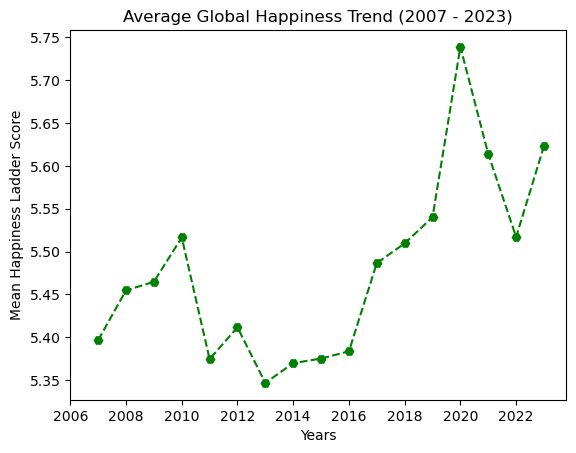

In [26]:
plt.plot(avg_happiness["year"],avg_happiness["life_ladder"],marker='H',linestyle='--',color="g")
xlabels=np.arange(2006,2023,2)
plt.xticks(xlabels)
plt.xlabel("Years")
plt.ylabel("Mean Happiness Ladder Score")
plt.title("Average Global Happiness Trend (2007 - 2023)")
plt.savefig("avg_global_trend.png")
plt.show()


In [15]:
whr_df = whr_df.sort_values(by=["life_ladder"],ascending=False)
whr_23 = whr_df[whr_df["year"] == 2023]
whr_23.to_csv("data/whr23_filtered.csv")
whr_avg_23 = whr_23["life_ladder"].mean()

top_5_countries = whr_23["country_name"].head()
top_5_scores = whr_23["life_ladder"].head()
bot_5_countries = whr_23["country_name"].tail()
bot_5_scores = whr_23["life_ladder"].tail()
whr_avg_23


5.623133333333333

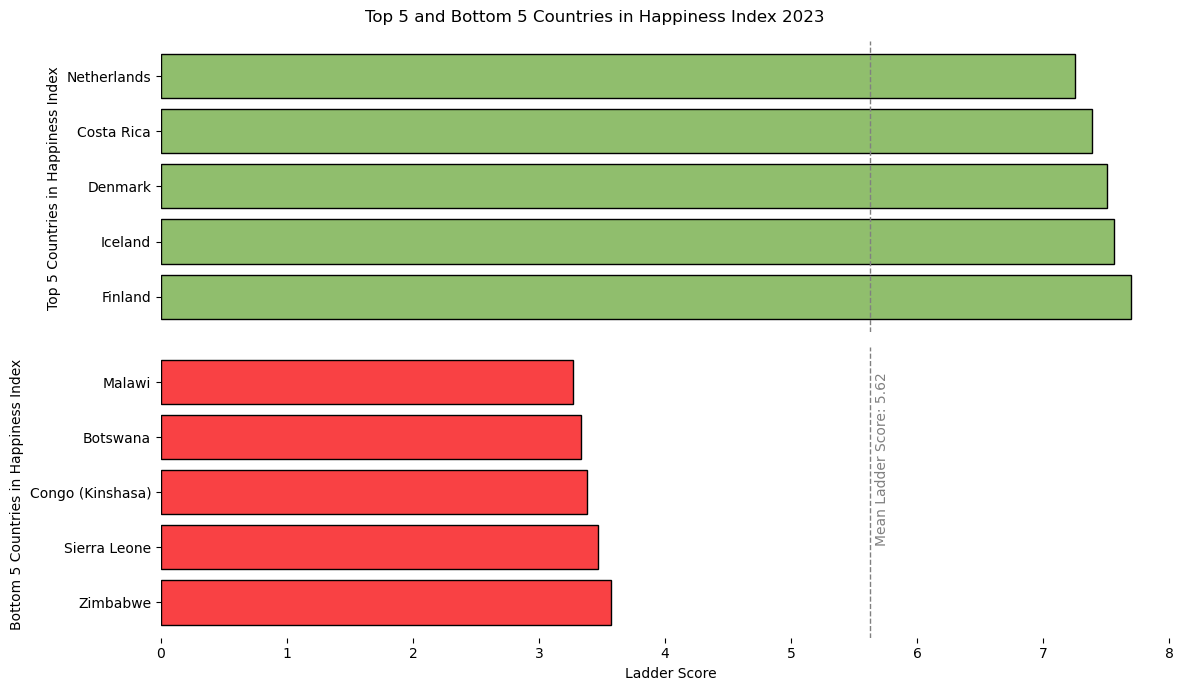

In [16]:
fig,axs = plt.subplots(2,1,layout="constrained",sharex=True,figsize=(12,7))

axs[0].barh(top_5_countries,top_5_scores,height=0.8,edgecolor="black",color=color[4])
axs[0].axvline(x=whr_avg_23,color="gray",linestyle="--",linewidth=1)
axs[0].set_ylabel("Top 5 Countries in Happiness Index ")
axs[1].barh(bot_5_countries,bot_5_scores,height=0.8,edgecolor="black",color=color[0])
axs[1].axvline(x=whr_avg_23,color="gray",linestyle="--",linewidth=1)
axs[1].text(whr_avg_23 + 0.1, 0.9 * axs[1].get_ylim()[1], f'Mean Ladder Score: {whr_avg_23:.2f}', color='gray',
            verticalalignment='top', horizontalalignment='center', rotation=90)
axs[1].set_ylabel("Bottom 5 Countries in Happiness Index ")

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Ladder Score")
plt.suptitle("Top 5 and Bottom 5 Countries in Happiness Index 2023")
plt.tight_layout()
plt.savefig("top5bot5.png")
plt.show()
    





In [17]:
whr_23_open = whr_23.iloc[:,[6,0,1,2,3,4,5,7,8]].sort_values("freedom_to_make_life_choices",ascending=False)
top_open = whr_23_open.head(10)
bot_open = whr_23_open.tail(10)

top_open

,freedom_to_make_life_choices,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,generosity,perceptions_of_corruption
1293,0.965,Malaysia,2023,5.868,10.283,0.779,65.6,0.154,0.754
330,0.961,Cambodia,2023,4.221,8.462,0.738,62.3,0.070,0.799
2313,0.956,Vietnam,2023,6.325,9.392,0.845,65.7,-0.159,0.655
680,0.943,Finland,2023,7.699,10.808,0.947,71.3,-0.001,0.185
1147,0.943,Kyrgyzstan,2023,5.910,8.573,0.946,67.9,0.145,0.899
632,0.942,El Salvador,2023,6.482,9.167,0.744,66.3,-0.104,0.496
1594,0.938,Norway,2023,7.249,11.125,0.952,71.6,0.219,0.245
490,0.933,Costa Rica,2023,7.384,10.021,0.875,70.0,-0.067,0.767
1683,0.932,Philippines,2023,6.184,9.102,0.796,62.1,-0.038,0.768
1882,0.931,Slovenia,2023,6.746,10.664,0.911,71.4,0.031,0.750


In [18]:
top_columns = top_open.columns
top_open.style.bar(subset=["freedom_to_make_life_choices","life_ladder","log_gdp_per_capita","social_support","healthy_life_expectancy_at_birth","generosity","perceptions_of_corruption"],cmap="seismic").set_properties(color="black")


,freedom_to_make_life_choices,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,generosity,perceptions_of_corruption
1293,0.965000,Malaysia,2023,5.868000,10.283000,0.779000,65.600000,0.154000,0.754000
330,0.961000,Cambodia,2023,4.221000,8.462000,0.738000,62.300000,0.070000,0.799000
2313,0.956000,Vietnam,2023,6.325000,9.392000,0.845000,65.700000,-0.159000,0.655000
680,0.943000,Finland,2023,7.699000,10.808000,0.947000,71.300000,-0.001000,0.185000
1147,0.943000,Kyrgyzstan,2023,5.910000,8.573000,0.946000,67.900000,0.145000,0.899000
632,0.942000,El Salvador,2023,6.482000,9.167000,0.744000,66.300000,-0.104000,0.496000
1594,0.938000,Norway,2023,7.249000,11.125000,0.952000,71.600000,0.219000,0.245000
490,0.933000,Costa Rica,2023,7.384000,10.021000,0.875000,70.000000,-0.067000,0.767000
1683,0.932000,Philippines,2023,6.184000,9.102000,0.796000,62.100000,-0.038000,0.768000
1882,0.931000,Slovenia,2023,6.746000,10.664000,0.911000,71.400000,0.031000,0.750000


In [19]:
bot_open.style.bar(subset=["freedom_to_make_life_choices","life_ladder","log_gdp_per_capita","social_support","healthy_life_expectancy_at_birth","generosity","perceptions_of_corruption"],cmap="seismic")

,freedom_to_make_life_choices,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,generosity,perceptions_of_corruption
938,0.615000,Iran,2023,5.004000,9.651000,0.809000,66.900000,0.254000,0.764000
787,0.589000,Greece,2023,5.796000,10.387000,0.818000,71.400000,-0.223000,0.805000
387,0.586000,Chad,2023,4.544000,7.254000,0.609000,53.500000,0.138000,0.755000
506,0.573000,Croatia,2023,5.958000,10.462000,0.909000,69.300000,-0.205000,0.810000
1341,0.540000,Mauritania,2023,4.292000,8.620000,0.606000,60.700000,0.018000,0.669000
2154,0.523000,Türkiye,2023,5.463000,10.429000,0.860000,69.100000,-0.159000,0.748000
1262,0.504000,Madagascar,2023,4.433000,7.333000,0.692000,58.300000,0.096000,0.784000
1194,0.499000,Lebanon,2023,3.588000,9.471000,0.686000,66.300000,-0.102000,0.895000
2126,0.482000,Tunisia,2023,4.505000,9.282000,0.702000,67.100000,-0.226000,0.882000
448,0.452000,Comoros,2023,3.588000,8.095000,0.483000,59.600000,0.004000,0.704000


In [20]:
from psynlig import plot_correlation_heatmap

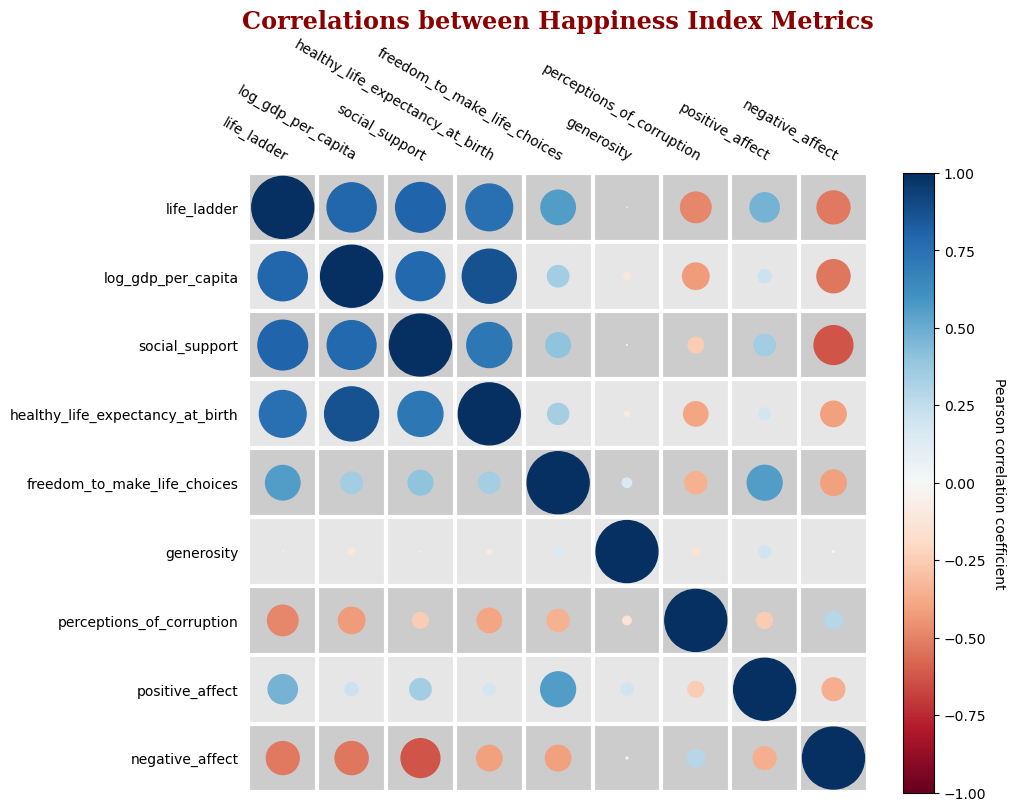

In [27]:
kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'RdBu',
    },
    'figure': {
        'figsize': (10, 8),
    },
}

corr_data = whr_23[['life_ladder','log_gdp_per_capita','social_support','healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices','generosity','perceptions_of_corruption','positive_affect','negative_affect']]

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 'xx-large',
        }
plot_correlation_heatmap(corr_data,bubble=True,annotate=False, **kwargs)
plt.title("Correlations between Happiness Index Metrics",fontdict=font)
plt.savefig("corr_plot.png")
plt.show()

In [23]:
whr_23

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
680,Finland,2023,7.699,10.808,0.947,71.3,0.943,-0.001,0.185,0.717,0.173
886,Iceland,2023,7.562,10.934,0.979,72.1,0.918,0.299,0.697,0.793,0.185
556,Denmark,2023,7.504,10.996,0.916,71.5,0.923,0.089,0.184,0.757,0.229
490,Costa Rica,2023,7.384,10.021,0.875,70.0,0.933,-0.067,0.767,0.806,0.282
1498,Netherlands,2023,7.255,10.977,0.915,71.7,0.847,0.223,0.424,0.693,0.202
...,...,...,...,...,...,...,...,...,...,...,...
2362,Zimbabwe,2023,3.572,7.679,0.694,55.0,0.735,-0.069,0.757,0.610,0.179
1835,Sierra Leone,2023,3.467,7.412,0.601,56.1,0.694,0.101,0.866,0.504,0.430
472,Congo (Kinshasa),2023,3.383,7.076,0.572,55.8,0.687,0.152,0.837,0.546,0.497
258,Botswana,2023,3.332,9.673,0.701,55.0,0.741,-0.264,0.814,0.657,0.247


In [25]:



data = dict(type = 'choropleth', 
           locations = whr_23['country_name'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = whr_23['life_ladder'], 
           text = whr_23['country_name'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}),
              margin=dict(l=50,r=50,t=50,b=50),
              width=1000,
              height=600)
              
              
              

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)